#### selectivesearch 설치

In [ ]:
!pip install selectivesearch

#### 깃헙에서 이미지 가져오기

In [ ]:
!git clone https://github.com/minmaxHong/ComputerVision

#### Img 로드가 잘 되었는지 시각화

opencv로 RGB Img열면 BGR로 바뀜, RGB로 바꿔줘야함

img shape: (877, 659, 3)


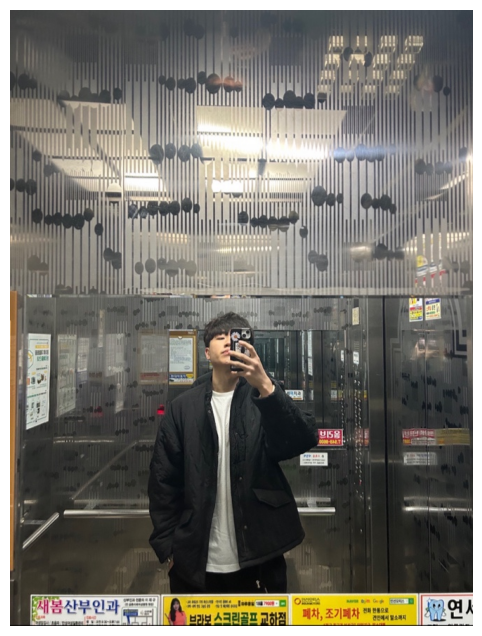

In [6]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

img = cv2.imread('/content/ComputerVision/data/Image/me.jpg')

# == BGR -> RGB ==
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Parameter


#### scale
* 원본 이미지의 크기를 기준으로 한 비율을 나타낸다.

* scale = 100으로 설정하면 원본 이미지보다 1/100 크기의 이미지부터 시작하여 원본 이미지까지 여러 가지 크기의 이미지를 만들게 된다.

* 값을 높게 설정할수록 계산량이 많아진다.


#### min_size

* 선택된 영역의 최소 크기를 지정

* min_size = 5000이면, 원하는 크기 이상의 영역만 선택하도록 지정한다.






img_segments는 segmentation된 이미지의 배열이며, 4차원으로 되어 있는데, 마지막 값은 해당 regions를 가리키는 index 값이다.

In [10]:
img_segments, regions = selectivesearch.selective_search(img_rgb, scale = 100, min_size = 5000)

type(regions), len(regions)

(list, 47)

### regions 반환값

##### rect

* (Xmin, Ymin, Xmax, Ymax)

##### size

* resolution

##### labels

* 식별하기 위한 고유값

* labels값이 여러 개이면, 합쳐야겠다는 의미

* 내려갈수록 큰 bounding box이며, 여러개의 object가 있을 확률이 커진다.


In [ ]:
regions

In [14]:
rects = [cand['rect'] for cand in regions]
print(rects)

[(0, 0, 299, 405), (237, 0, 153, 330), (359, 0, 197, 180), (460, 0, 198, 342), (355, 62, 153, 283), (22, 135, 264, 429), (0, 165, 74, 493), (496, 200, 162, 425), (462, 207, 99, 197), (225, 209, 270, 201), (10, 406, 213, 355), (226, 406, 191, 119), (266, 406, 216, 311), (438, 406, 94, 422), (495, 407, 163, 422), (533, 407, 77, 241), (0, 443, 232, 433), (179, 464, 403, 366), (280, 542, 176, 257), (538, 596, 120, 232), (390, 623, 146, 206), (564, 712, 94, 116), (30, 830, 628, 46), (29, 832, 187, 43), (29, 830, 629, 46), (495, 407, 163, 422), (390, 407, 220, 422), (460, 0, 198, 404), (438, 406, 220, 423), (237, 0, 271, 345), (266, 406, 344, 423), (22, 135, 395, 429), (460, 0, 198, 625), (266, 406, 392, 423), (225, 0, 283, 410), (0, 135, 417, 523), (179, 464, 403, 366), (0, 0, 508, 410), (266, 406, 392, 423), (179, 406, 479, 424), (10, 406, 648, 424), (0, 0, 556, 410), (0, 406, 658, 470), (0, 0, 658, 625), (0, 0, 658, 658), (0, 406, 658, 470), (0, 0, 658, 876)]


#### bounding box 시각화

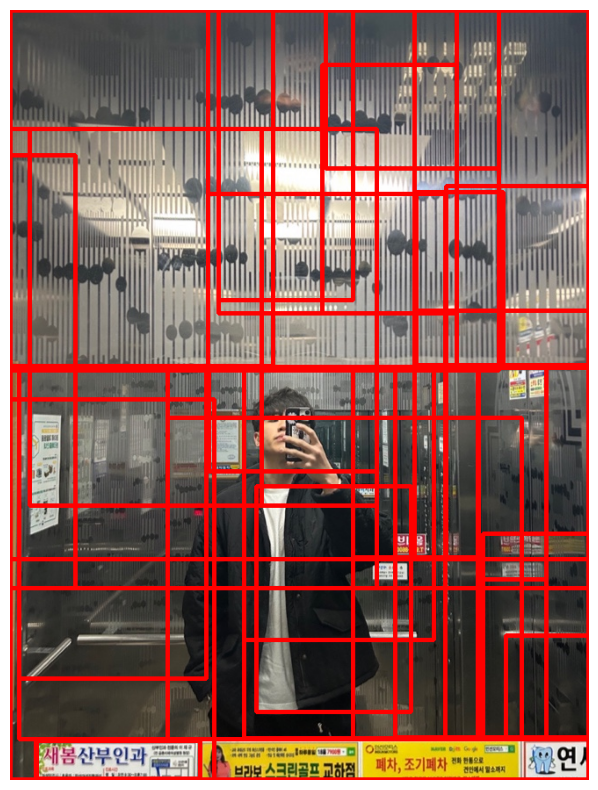

In [29]:
img_rgb_copy = img_rgb.copy()

for rect in rects:
  x1 = rect[0]
  y1 = rect[1]

  # == rect[2]와 rect[3]는 너비와 높이여서 각각 x1,y1을 더해야한다.
  x2 = rect[2] + x1
  y2 = rect[3] + y1

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (x1, y1), (x2, y2), color = (255, 0, 0), thickness = 3)

plt.figure(figsize = (10, 10))
plt.imshow(img_rgb_copy)
plt.axis('off')
plt.show()

#### bounding box 크기만 큰 것만 추출해서 보기

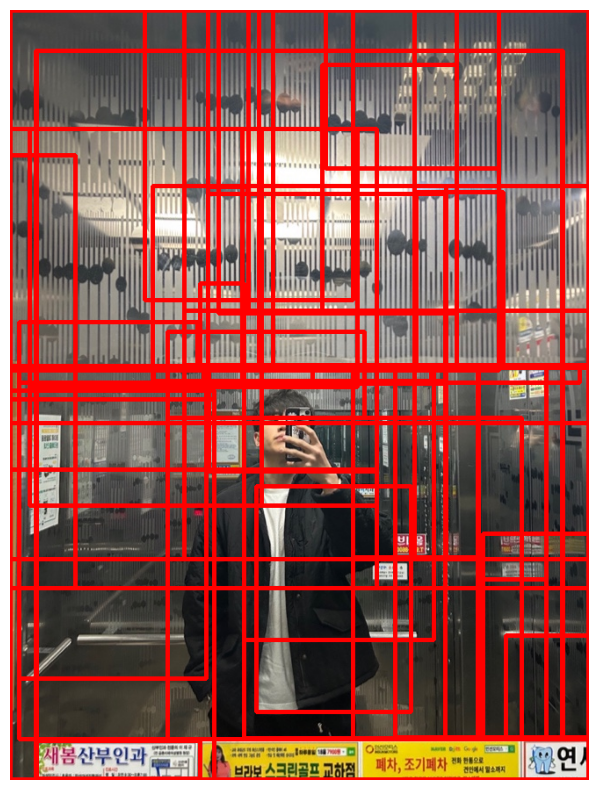

In [27]:
large_rect = [cand['rect'] for cand in regions if cand['size'] > 50000]

for rect in large_rect:
  x1 = rect[0]
  y1 = rect[1]
  x2 = rect[2] + x1
  y2 = rect[3] + y1

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (x1, y1), (x2, y2), color = (255, 0, 0), thickness = 3)

plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_rgb_copy)